In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import itertools

sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5)

In [127]:
network_files = {
    "BioPlex3": "processed_data/networks/BioPlex3_shared/edges_list_ncbi.csv",
    "HumanNet": "processed_data/networks/HumanNetV3/edges_list_ncbi.csv",
    "PCNet": "processed_data/networks/PCNet/edges_list_ncbi.csv",
    "ProteomeHD": "processed_data/networks/ProteomeHD/edges_list_ncbi.csv",
    "STRING": "processed_data/networks/STRING/edges_list_ncbi.csv",
}
networks = sorted(list(network_files.keys()))
alpha_array = [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
diseases=["asthma", "autism", "schizophrenia"]
diseases_labels = ["Asthma", "ASD", "Schizophrenia"]
dmap = {d: dlab for d, dlab in zip(diseases, diseases_labels)}
K_values = [5, 10, 20, 50, 100]
networks

['BioPlex3', 'HumanNet', 'PCNet', 'ProteomeHD', 'STRING']

In [128]:
metrics_order = ["Precision", "Average Precision"]

# Seeds vs scores

In [129]:
results_RWRs_scores = pd.read_csv("outputs/results_RWRs/RWRs_gene_scores_single_nets.csv")
results_RWRs_scores = results_RWRs_scores[results_RWRs_scores["K"]!=10]
results_RWRs_scores["Disease"] =  list(results_RWRs_scores["Disease"].map(dmap).values)
results_RWRs_scores

,Network,Alpha,Metric,K,Value,Method,Disease
0,BioPlex3,0.1,Precision,5,0.800000,Score,Asthma
1,BioPlex3,0.1,Average Precision,5,0.910000,Score,Asthma
4,BioPlex3,0.1,Precision,20,0.700000,Score,Asthma
5,BioPlex3,0.1,Average Precision,20,0.786014,Score,Asthma
6,BioPlex3,0.1,Precision,50,0.480000,Score,Asthma
...,...,...,...,...,...,...,...
895,STRING,0.9,Average Precision,20,0.010851,Score,Schizophrenia
896,STRING,0.9,Precision,50,0.040000,Score,Schizophrenia
897,STRING,0.9,Average Precision,50,0.024020,Score,Schizophrenia
898,STRING,0.9,Precision,100,0.030000,Score,Schizophrenia


In [130]:
results_RWRs_seeds = pd.read_csv("outputs/results_RWRs/RWRs_seed_genes_single_nets.csv")
results_RWRs_seeds = results_RWRs_seeds[results_RWRs_seeds["K"]!=10]
results_RWRs_seeds["Disease"] =  list(results_RWRs_seeds["Disease"].map(dmap).values)
results_RWRs_seeds

,Network,Alpha,Metric,K,Value,Method,Disease
0,BioPlex3,0.1,Precision,5,0.800000,Seed Genes,Asthma
1,BioPlex3,0.1,Average Precision,5,0.843333,Seed Genes,Asthma
4,BioPlex3,0.1,Precision,20,0.450000,Seed Genes,Asthma
5,BioPlex3,0.1,Average Precision,20,0.658891,Seed Genes,Asthma
6,BioPlex3,0.1,Precision,50,0.460000,Seed Genes,Asthma
...,...,...,...,...,...,...,...
895,STRING,0.9,Average Precision,20,0.385494,Seed Genes,Schizophrenia
896,STRING,0.9,Precision,50,0.100000,Seed Genes,Schizophrenia
897,STRING,0.9,Average Precision,50,0.229390,Seed Genes,Schizophrenia
898,STRING,0.9,Precision,100,0.140000,Seed Genes,Schizophrenia


In [164]:
df1 = results_RWRs_scores.groupby(by=["Network", "K", "Metric", "Disease"]).max()
df2 = results_RWRs_seeds.groupby(by=["Network", "K", "Metric", "Disease"]).max()


In [165]:
df1["Seeds Value"] = df2["Value"]
df1 = df1.reset_index(inplace=False)
# df1["Disease"] =  list(df1["Disease"].map(dmap).values)
df1

,Network,K,Metric,Disease,Alpha,Value,Method,Seeds Value
0,BioPlex3,5,Average Precision,ASD,0.9,0.156667,Score,0.000000
1,BioPlex3,5,Average Precision,Asthma,0.9,0.960000,Score,0.843333
2,BioPlex3,5,Average Precision,Schizophrenia,0.9,0.613333,Score,0.413333
3,BioPlex3,5,Precision,ASD,0.9,0.200000,Score,0.000000
4,BioPlex3,5,Precision,Asthma,0.9,0.800000,Score,0.800000
...,...,...,...,...,...,...,...,...
115,STRING,100,Average Precision,Asthma,0.9,0.578613,Score,0.516781
116,STRING,100,Average Precision,Schizophrenia,0.9,0.292186,Score,0.242671
117,STRING,100,Precision,ASD,0.9,0.150000,Score,0.110000
118,STRING,100,Precision,Asthma,0.9,0.470000,Score,0.450000


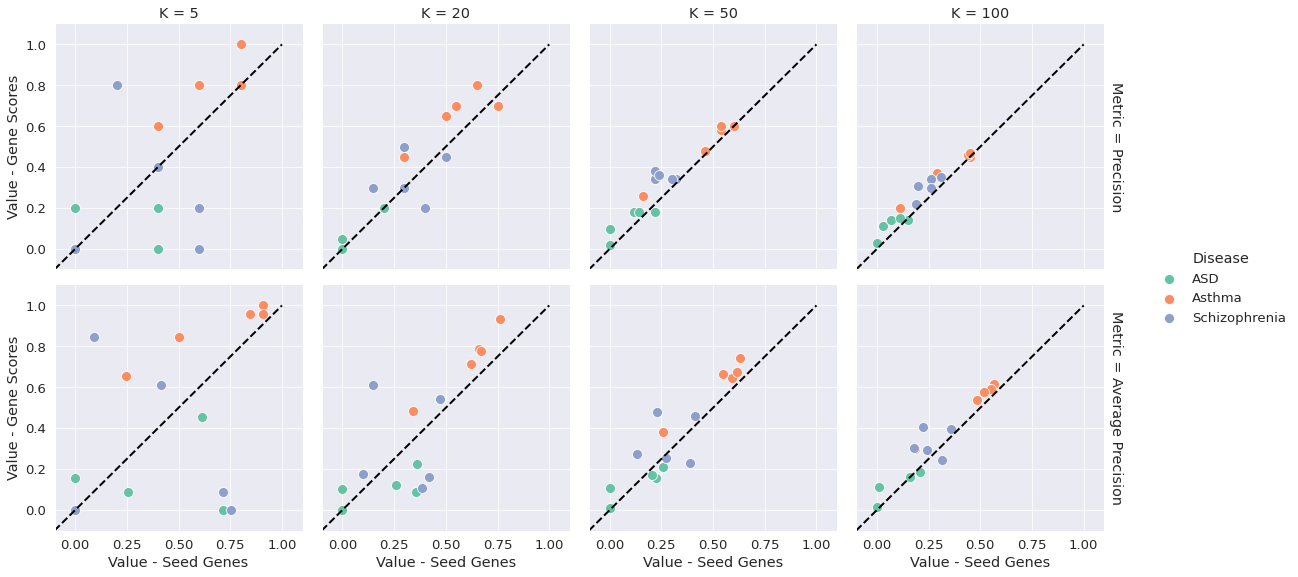

In [166]:
g = sns.FacetGrid(df1, col="K",  row="Metric", hue="Disease", margin_titles=True, height=4, aspect=1, palette="Set2", row_order=metrics_order)
g.map_dataframe(sns.scatterplot, x="Seeds Value", y="Value", s=100)
g.add_legend()
g.set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), xlabel="Value - Seed Genes", ylabel="Value - Gene Scores")

xx=[-0.1,1]
for (row_val, col_val), ax in g.axes_dict.items():
    ax.plot(xx, xx, linestyle="dashed", color="black", linewidth=2)

g.fig.savefig("outputs/plots/seeds_vs_scores_scatters.pdf", bbox_inches="tight")
plt.show()

In [134]:
df = pd.concat((results_RWRs_scores[results_RWRs_scores["Metric"]=="Average Precision"], results_RWRs_seeds[results_RWRs_seeds["Metric"]=="Average Precision"]))
df

,Network,Alpha,Metric,K,Value,Method,Disease
1,BioPlex3,0.1,Average Precision,5,0.910000,Score,Asthma
5,BioPlex3,0.1,Average Precision,20,0.786014,Score,Asthma
7,BioPlex3,0.1,Average Precision,50,0.647477,Score,Asthma
9,BioPlex3,0.1,Average Precision,100,0.536727,Score,Asthma
11,BioPlex3,0.2,Average Precision,5,0.910000,Score,Asthma
...,...,...,...,...,...,...,...
889,STRING,0.7,Average Precision,100,0.208011,Seed Genes,Schizophrenia
891,STRING,0.9,Average Precision,5,0.753333,Seed Genes,Schizophrenia
895,STRING,0.9,Average Precision,20,0.385494,Seed Genes,Schizophrenia
897,STRING,0.9,Average Precision,50,0.229390,Seed Genes,Schizophrenia


In [135]:
df_map = df.groupby(["Method", "Alpha",  "K"]).mean()
df_map = df_map.reset_index(inplace=False)
df_map = pd.pivot(df_map, index=["Alpha", "K"], columns="Method", values="Value")
df_map = df_map.reset_index(inplace=False)
df_map["Diff"] = df_map["Score"] - df_map["Seed Genes"]
df_map

Method,Alpha,K,Score,Seed Genes,Diff
0,0.1,5,0.365556,0.369333,-0.003778
1,0.1,20,0.361894,0.343841,0.018053
2,0.1,50,0.352522,0.305914,0.046608
3,0.1,100,0.319889,0.267601,0.052288
4,0.2,5,0.318222,0.381333,-0.063111
5,0.2,20,0.345269,0.344495,0.000774
6,0.2,50,0.342005,0.306000,0.036006
7,0.2,100,0.311824,0.267802,0.044022
8,0.3,5,0.291556,0.413556,-0.122000
9,0.3,20,0.323632,0.350490,-0.026858


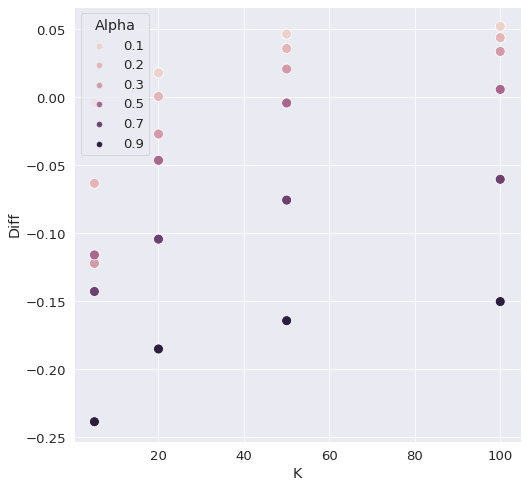

In [136]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df_map, x="K", y="Diff", hue="Alpha", ax=ax, s=100)
plt.show()

In [161]:
df = pd.concat((results_RWRs_scores, results_RWRs_seeds))
df

,Network,Alpha,Metric,K,Value,Method,Disease
0,BioPlex3,0.1,Precision,5,0.800000,Score,Asthma
1,BioPlex3,0.1,Average Precision,5,0.910000,Score,Asthma
4,BioPlex3,0.1,Precision,20,0.700000,Score,Asthma
5,BioPlex3,0.1,Average Precision,20,0.786014,Score,Asthma
6,BioPlex3,0.1,Precision,50,0.480000,Score,Asthma
...,...,...,...,...,...,...,...
895,STRING,0.9,Average Precision,20,0.385494,Seed Genes,Schizophrenia
896,STRING,0.9,Precision,50,0.100000,Seed Genes,Schizophrenia
897,STRING,0.9,Average Precision,50,0.229390,Seed Genes,Schizophrenia
898,STRING,0.9,Precision,100,0.140000,Seed Genes,Schizophrenia


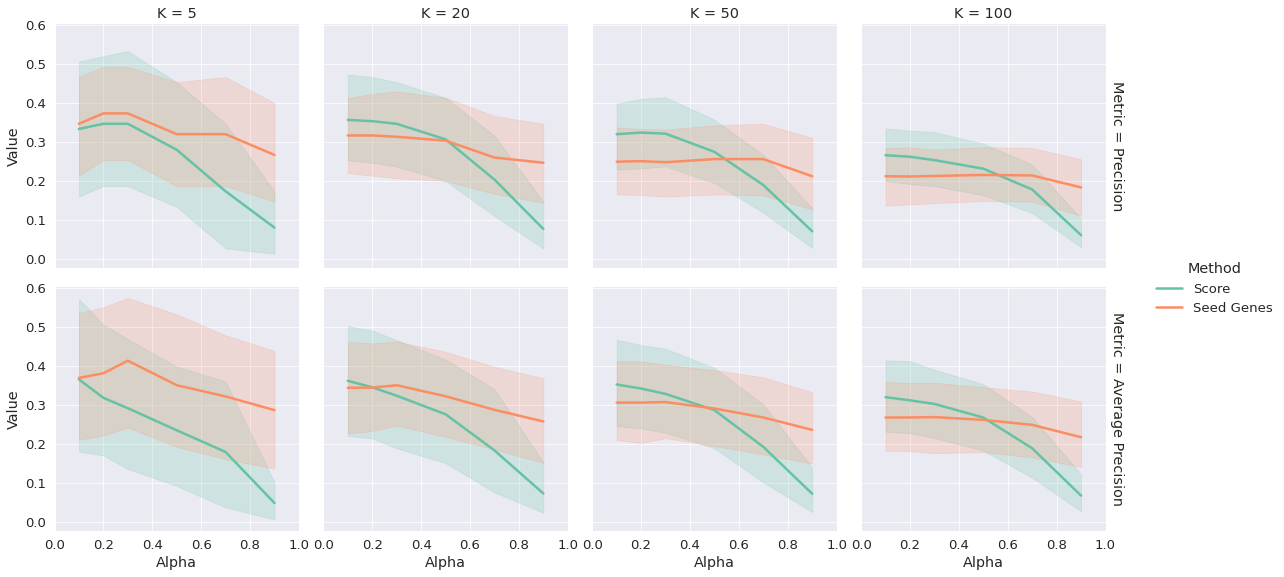

In [162]:
g = sns.FacetGrid(df, col="K",  row="Metric", hue="Method", margin_titles=True, height=4, aspect=1, palette="Set2", row_order=metrics_order)
g.map_dataframe(sns.lineplot, x="Alpha", y="Value", linewidth=2.5)
g.add_legend()
g.set(xlim=(0, 1), xlabel="Alpha", ylabel="Value")

# xx=[-0.1,1]
# for (row_val, col_val), ax in g.axes_dict.items():
#     ax.plot(xx, xx, linestyle="dashed", color="black", linewidth=2)
plt.subplots_adjust(wspace=0.1)
g.fig.savefig("outputs/plots/seeds_vs_scores_alpha.pdf", bbox_inches="tight")
plt.show()

# Network sizes

In [139]:
with open("processed_data/networks/networks_n_edges.json", "r") as f:
    networks_n_edges = json.load(f)
with open("processed_data/networks/networks_n_nodes.json", "r") as f:
    networks_n_nodes = json.load(f)

In [140]:
networks_n_nodes

{'BioPlex3': 8364,
 'HumanNet': 18593,
 'PCNet': 20517,
 'ProteomeHD': 2718,
 'STRING': 17079}

In [141]:
networks_n_edges

{'BioPlex3': 35704,
 'HumanNet': 1125494,
 'PCNet': 2693250,
 'ProteomeHD': 63290,
 'STRING': 420534}

In [ ]:
35704

In [172]:
network_densities = {}
for net in networks:
    n_edges = networks_n_edges[net]
    n_nodes = networks_n_nodes[net]  
    possible_connections = (n_nodes * (n_nodes-1))/2
    density = n_edges/possible_connections
    network_densities[net] = density
network_densities

{'BioPlex3': 0.0010208707217513686,
 'HumanNet': 0.006511748216830256,
 'PCNet': 0.012796762663506706,
 'ProteomeHD': 0.017140599224949173,
 'STRING': 0.0028835777247292658}

In [173]:
df1 = results_RWRs_scores.groupby(by=["Network", "K", "Metric", "Disease"]).max()
df1 = df1.reset_index(inplace=False).drop(["Method", "Alpha"], axis=1)
df1["Network Size"] = df1["Network"].map(networks_n_nodes)
df1["Network Density"] = df1["Network"].map(network_densities)
df1

,Network,K,Metric,Disease,Value,Network Size,Network Density
0,BioPlex3,5,Average Precision,ASD,0.156667,8364,0.001021
1,BioPlex3,5,Average Precision,Asthma,0.960000,8364,0.001021
2,BioPlex3,5,Average Precision,Schizophrenia,0.613333,8364,0.001021
3,BioPlex3,5,Precision,ASD,0.200000,8364,0.001021
4,BioPlex3,5,Precision,Asthma,0.800000,8364,0.001021
...,...,...,...,...,...,...,...
115,STRING,100,Average Precision,Asthma,0.578613,17079,0.002884
116,STRING,100,Average Precision,Schizophrenia,0.292186,17079,0.002884
117,STRING,100,Precision,ASD,0.150000,17079,0.002884
118,STRING,100,Precision,Asthma,0.470000,17079,0.002884


In [174]:
df1 = df1[df1["K"]>10]

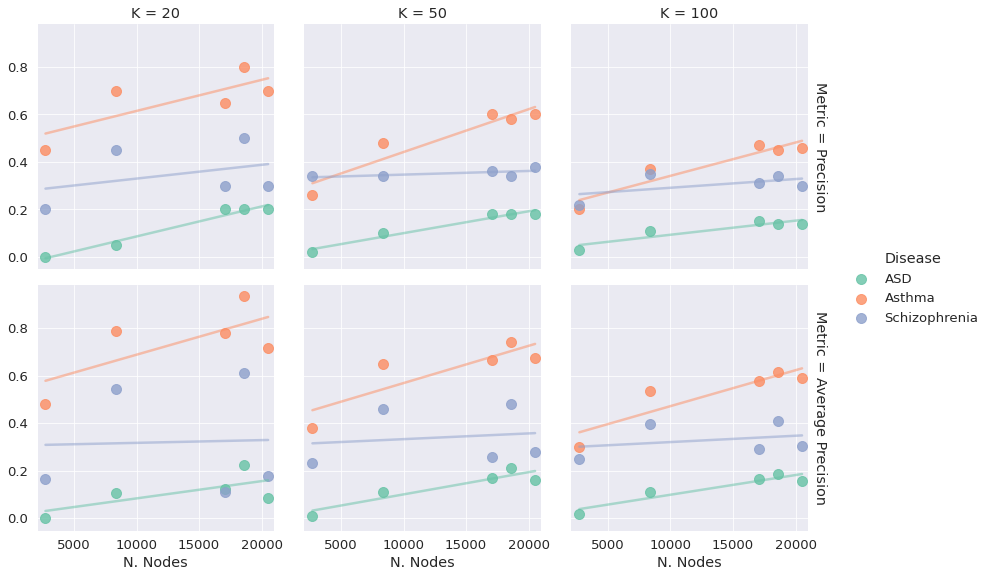

In [190]:
g = sns.FacetGrid(df1, col="K",  row="Metric", hue="Disease", margin_titles=True, height=4, aspect=1, palette="Set2", sharex=True, row_order=metrics_order)
g.map_dataframe(sns.regplot, x="Network Size", y="Value", scatter_kws={'s':100}, line_kws={"linewidth":2.5, "alpha":0.5}, ci=None) #, s=100
g.add_legend()
g.set(xlim=(2000, 21000))
g.set_axis_labels("N. Nodes")

# g.fig.suptitle("Effect of Network Size")
# xx=[-0.1,1]
# for (row_val, col_val), ax in g.axes_dict.items():
#     ax.plot(xx, xx, linestyle="dashed", color="black", linewidth=2)

# g.fig.savefig("outputs/plots/seeds_vs_scores_scatters.pdf", bbox_inches="tight")
g.fig.savefig("outputs/plots/networks_size_regplots.pdf", bbox_inches="tight")
plt.show()

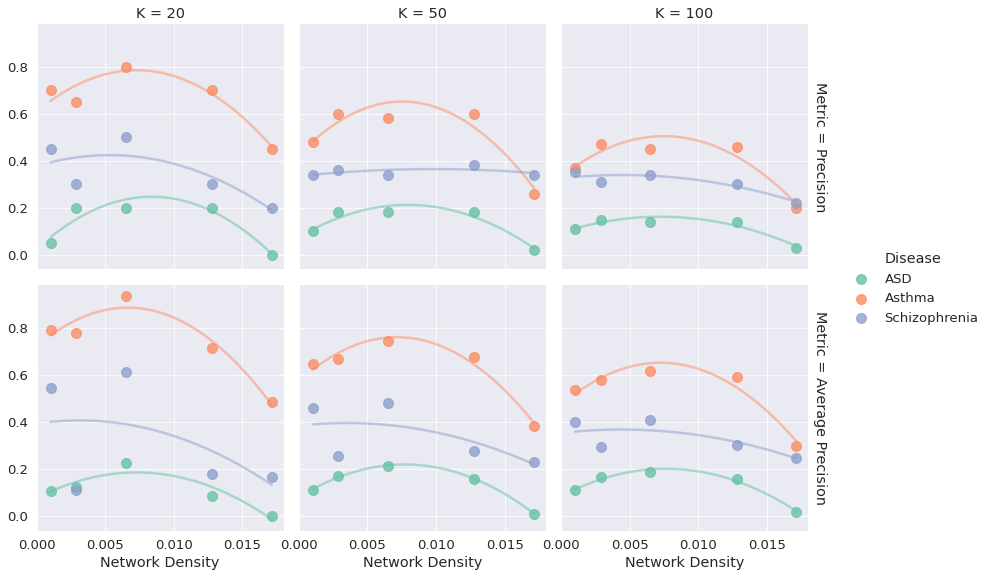

In [189]:
g = sns.FacetGrid(df1, col="K",  row="Metric", hue="Disease", margin_titles=True, height=4, aspect=1, palette="Set2", row_order=metrics_order)
g.map_dataframe(sns.regplot, x="Network Density", y="Value", order=2, ci=None, scatter_kws={'s':100}, line_kws={"linewidth":2.5, "alpha":0.5})#, s=100
# g.map_dataframe(sns.scatterplot, x="Network Density", y="Value",  s=100)#,lineplot
# g.map_dataframe(sns.lineplot, x="Network Density", y="Value",  markers=True)#,lineplot
g.add_legend()
g.set(xlim=(0, 0.018))
g.set_axis_labels("Network Density")
# g.fig.suptitle("Effect of Network Density")
# xx=[-0.1,1]
# for (row_val, col_val), ax in g.axes_dict.items():
#     ax.plot(xx, xx, linestyle="dashed", color="black", linewidth=2)
# g.fig.tight_layout()
g.fig.savefig("outputs/plots/networks_density_regplots.pdf", bbox_inches="tight")
plt.show()

# Ensemble Methods

In [191]:
avg_rank_results = pd.read_csv("outputs/results_AVG/AVG_rank_gene_scores.csv")
avg_rank_results = avg_rank_results[avg_rank_results["K"]>10]
avg_rank_results["Disease"] =  list(avg_rank_results["Disease"].map(dmap).values)
avg_rank_results

,Alpha,Metric,K,Value,Method,Disease
4,0.1,Precision,20,0.700000,Avg. Rank,Asthma
5,0.1,Average Precision,20,0.838164,Avg. Rank,Asthma
6,0.1,Precision,50,0.560000,Avg. Rank,Asthma
7,0.1,Average Precision,50,0.721029,Avg. Rank,Asthma
8,0.1,Precision,100,0.460000,Avg. Rank,Asthma
...,...,...,...,...,...,...
175,0.9,Average Precision,20,0.087550,Avg. Rank,Schizophrenia
176,0.9,Precision,50,0.160000,Avg. Rank,Schizophrenia
177,0.9,Average Precision,50,0.136778,Avg. Rank,Schizophrenia
178,0.9,Precision,100,0.170000,Avg. Rank,Schizophrenia


In [192]:
avg_score_results = pd.read_csv("outputs/results_AVG/AVG_score_gene_scores.csv")
avg_score_results = avg_score_results[avg_score_results["K"]>10]
avg_score_results["Disease"] =  list(avg_score_results["Disease"].map(dmap).values)
avg_score_results

,Alpha,Metric,K,Value,Method,Disease
4,0.1,Precision,20,0.600000,Avg. Score,Asthma
5,0.1,Average Precision,20,0.551431,Avg. Score,Asthma
6,0.1,Precision,50,0.560000,Avg. Score,Asthma
7,0.1,Average Precision,50,0.577072,Avg. Score,Asthma
8,0.1,Precision,100,0.450000,Avg. Score,Asthma
...,...,...,...,...,...,...
175,0.9,Average Precision,20,0.038439,Avg. Score,Schizophrenia
176,0.9,Precision,50,0.080000,Avg. Score,Schizophrenia
177,0.9,Average Precision,50,0.049480,Avg. Score,Schizophrenia
178,0.9,Precision,100,0.070000,Avg. Score,Schizophrenia


In [193]:
multiplex_results = pd.read_csv("outputs/results_MultiplexRWRs/MultiplexRWR_gene_scores.csv")
multiplex_results = multiplex_results[multiplex_results["K"]>10]
multiplex_results["Disease"] =  list(multiplex_results["Disease"].map(dmap).values)
multiplex_results["Method"] = "Multilayer RWR"
multiplex_results

,Alpha,Metric,K,Value,Method,Disease
4,0.1,Precision,20,0.650000,Multilayer RWR,Asthma
5,0.1,Average Precision,20,0.773365,Multilayer RWR,Asthma
6,0.1,Precision,50,0.580000,Multilayer RWR,Asthma
7,0.1,Average Precision,50,0.682189,Multilayer RWR,Asthma
8,0.1,Precision,100,0.450000,Multilayer RWR,Asthma
...,...,...,...,...,...,...
175,0.9,Average Precision,20,0.000000,Multilayer RWR,Schizophrenia
176,0.9,Precision,50,0.000000,Multilayer RWR,Schizophrenia
177,0.9,Average Precision,50,0.000000,Multilayer RWR,Schizophrenia
178,0.9,Precision,100,0.000000,Multilayer RWR,Schizophrenia


In [194]:
df3 = results_RWRs_scores[results_RWRs_scores["K"]>10]

In [195]:
df = pd.concat((avg_rank_results, avg_score_results, multiplex_results, df3)).drop("Network", axis=1)
df = df[df["Metric"]=="Precision"]

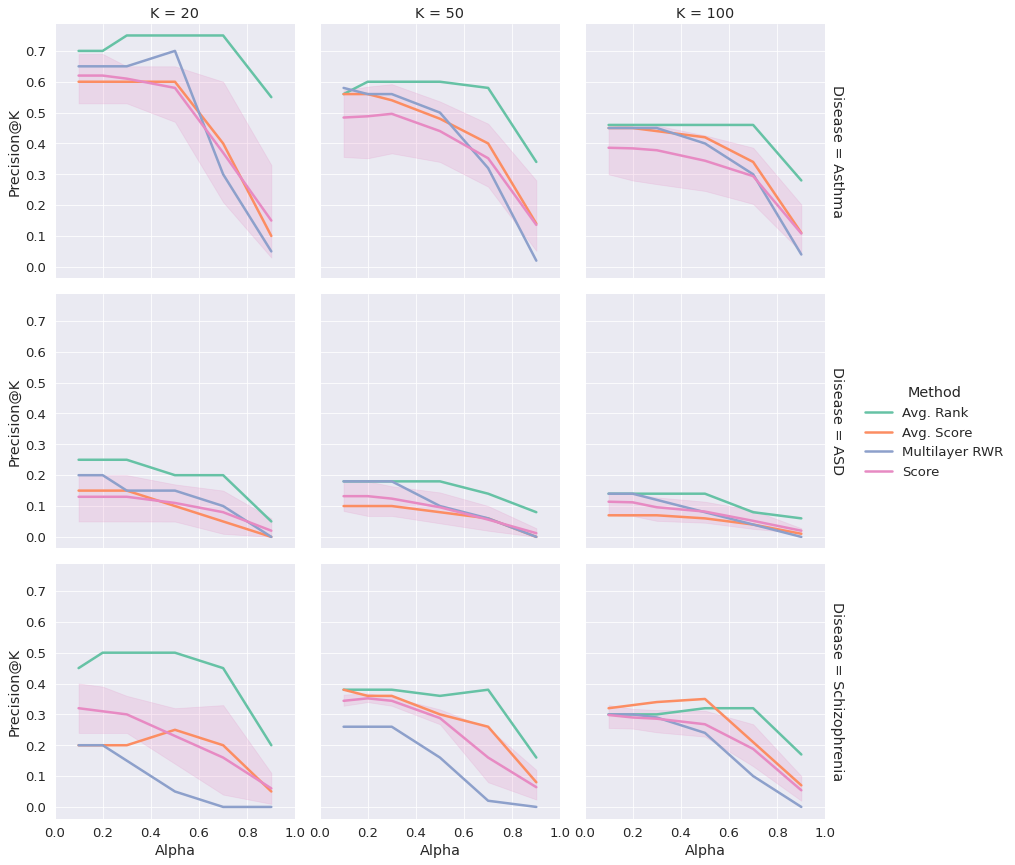

In [196]:
g = sns.FacetGrid(df, col="K",  row="Disease", hue="Method", margin_titles=True, height=4, aspect=1, palette="Set2")
g.map_dataframe(sns.lineplot, x="Alpha", y="Value", linewidth=2.5 )
g.add_legend()
g.set(xlim=(0, 1), xlabel="Alpha", ylabel="Precision@K")

# xx=[-0.1,1]
# for (row_val, col_val), ax in g.axes_dict.items():
#     ax.plot(xx, xx, linestyle="dashed", color="black", linewidth=2)
plt.subplots_adjust(wspace=0.1)
g.fig.savefig("outputs/plots/ensemble_methods.pdf", bbox_inches="tight")
plt.show()